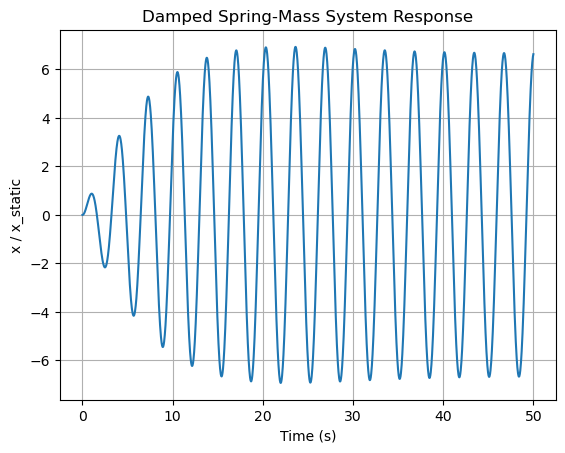

In [2]:
import numpy as np
from scipy.integrate import odeint

# Define constants
mass = 0.5
kstiff = 2.0
ksi = 0.06

# Damping coefficient
cdamp = 2 * ksi * np.sqrt(kstiff * mass)

# Forcing parameters
fampl = 1.0
fomeg = 0.95 * np.sqrt(kstiff / mass)

# Time span and initial conditions
t = np.linspace(0, 50, 2000)
z0 = np.array([0.0, 0.0])  # Initial position and velocity

# Function for the spring-mass system
def springmass(z, t, fomeg, fampl, cdamp, mass, kstiff):
    x, v = z  # Separate position and velocity
    force = fampl * np.cos(fomeg * t)
    a = (-kstiff * x - cdamp * v + force) / mass
    return np.array([v, a])

# Solve ODE using odeint
z = odeint(springmass, z0, t, args=(fomeg, fampl, cdamp, mass, kstiff))

# Calculate analytical solution for maximum dynamic amplification factor (DAF)
ratio = fomeg / np.sqrt(kstiff / mass)
DAFanalytical = 1 / np.sqrt((1 - ratio**2)**2 + (2 * ksi * ratio)**2)

# Plot results
plt.plot(t, z[:, 0] * kstiff / fampl)
plt.xlabel('Time (s)')
plt.ylabel('x / x_static')
plt.title('Damped Spring-Mass System Response')
plt.grid(True)
plt.show()
